# Machine Learning Modeling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [3]:
dir_name = 'data_files/'

X_train = pd.read_csv(dir_name + 'preprocessed_X_train.csv')
y_train = pd.read_csv(dir_name + 'y_train.csv')
X_test = pd.read_csv(dir_name + 'preprocessed_X_test.csv')
y_test = pd.read_csv(dir_name + 'y_test.csv')

In [14]:
X_train

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,room_type_Shared room,city_Athens,city_Barcelona,city_Berlin,city_Budapest,city_Lisbon,city_London,city_Paris,city_Rome,city_Vienna
0,0.0,0.0,0.25,0.0,0.0,1.0,0.5,0.9250,0.5,0.508842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.50,0.0,0.0,0.0,1.0,1.0000,0.5,0.457816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.50,0.0,0.0,1.0,1.0,1.0000,1.0,0.220252,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.00,0.0,0.0,0.0,0.5,0.9250,0.5,0.544142,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.25,1.0,0.0,1.0,0.5,0.9500,0.0,0.562661,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41360,0.0,1.0,0.00,0.0,0.0,0.0,1.0,0.9250,0.5,0.466583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41361,0.0,0.0,0.50,0.0,0.0,1.0,0.5,0.8875,0.5,0.219252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41362,0.0,0.0,0.50,0.0,0.0,0.0,0.5,0.9625,0.5,0.456433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41363,0.0,1.0,0.00,1.0,0.0,0.0,1.0,1.0000,0.5,0.373007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train.columns

Index(['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng',
       'lat', 'is_weekend', 'room_type_Private room', 'room_type_Shared room',
       'city_Athens', 'city_Barcelona', 'city_Berlin', 'city_Budapest',
       'city_Lisbon', 'city_London', 'city_Paris', 'city_Rome', 'city_Vienna'],
      dtype='object')

## Models Experiment

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Plot y_predict x y_actual

def plot_predict_actual(y_actual, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_pred)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

In [25]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [26]:
evaluation_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    evaluation_metrics[name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R2': train_r2,
        'Test R2': test_r2
    }

    print(f"📊 {name}")
    print(f"  🟢 Train - MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
    print(f"  🔵 Test  - MAE: {test_mae:.4f}, R2: {test_r2:.4f}\n")

📊 LinearRegression
  🟢 Train - MAE: 82031.1961, R2: 0.2279
  🔵 Test  - MAE: 87075.9607, R2: 0.2278

📊 Ridge
  🟢 Train - MAE: 82178.9100, R2: 0.2265
  🔵 Test  - MAE: 87170.4743, R2: 0.2269

📊 Lasso
  🟢 Train - MAE: 83278.6045, R2: 0.2162
  🔵 Test  - MAE: 88461.9117, R2: 0.2155



c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


📊 RandomForest
  🟢 Train - MAE: 7569.9162, R2: 0.9288
  🔵 Test  - MAE: 37345.4328, R2: 0.6688



c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


📊 GradientBoosting
  🟢 Train - MAE: 61842.4009, R2: 0.4179
  🔵 Test  - MAE: 78051.5244, R2: 0.3078



### Random Forest

In [15]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train.squeeze())

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}


In [21]:
y_train_predict = random_search.best_estimator_.predict(X_train)
y_test_predict = random_search.best_estimator_.predict(X_test)

In [22]:
mse_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)

mse_test = mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

print("Train MSE: ", mse_train)
print("Train r2: ", r2_train)
print("Test MSE: ", mse_test)
print("Test r2: ", r2_test)

Train MSE:  4434.623889949537
Train r2:  0.9582604129857176
Test MSE:  35518.4643716306
Test r2:  0.6850035522271998


In [20]:
importances = random_search.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                       Feature  Importance
14                         lat    0.160164
11                  attr_index    0.130723
13                         lng    0.128827
12                  rest_index    0.109257
9                         dist    0.099196
10                  metro_dist    0.077686
8                     bedrooms    0.060384
2              person_capacity    0.054872
7   guest_satisfaction_overall    0.038394
1                 room_private    0.020591
16      room_type_Private room    0.020537
6           cleanliness_rating    0.015351
23                 city_London    0.012513
5                          biz    0.010057
19              city_Barcelona    0.008322
3            host_is_superhost    0.008108
24                  city_Paris    0.007508
18                 city_Athens    0.006382
22                 city_Lisbon    0.006036
4                        multi    0.005644
25                   city_Rome    0.004379
20                 city_Berlin    0.003920
15         

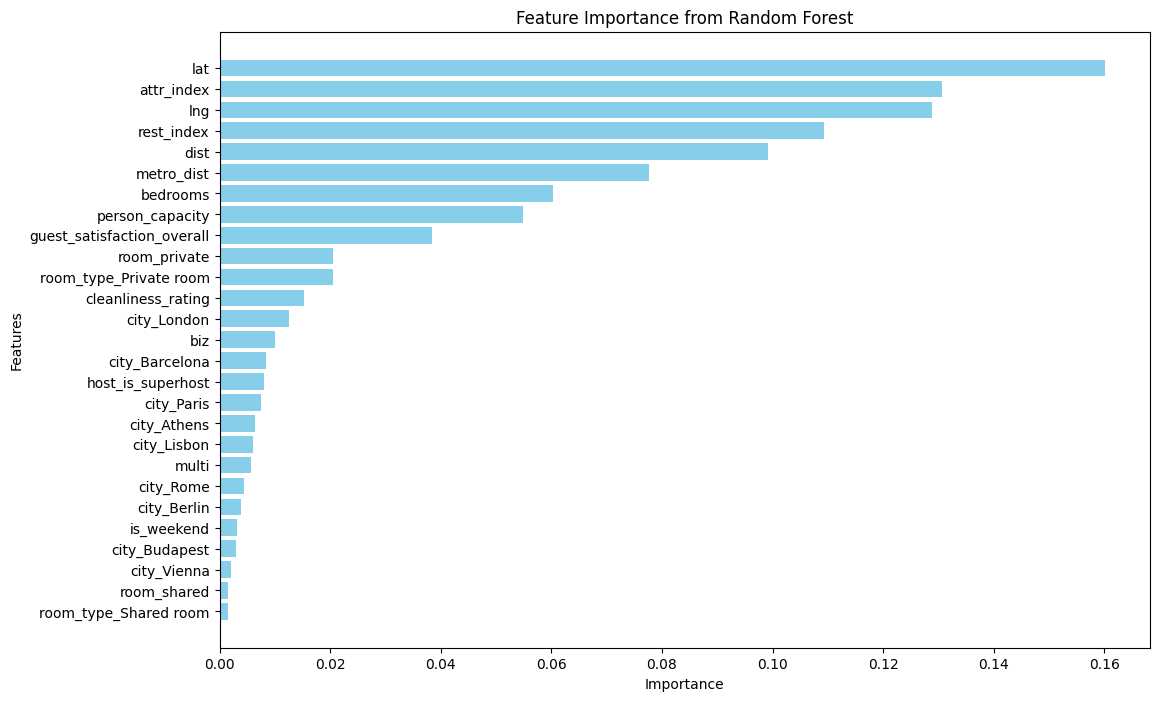

In [23]:
plt.figure(figsize=(12, 8))
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

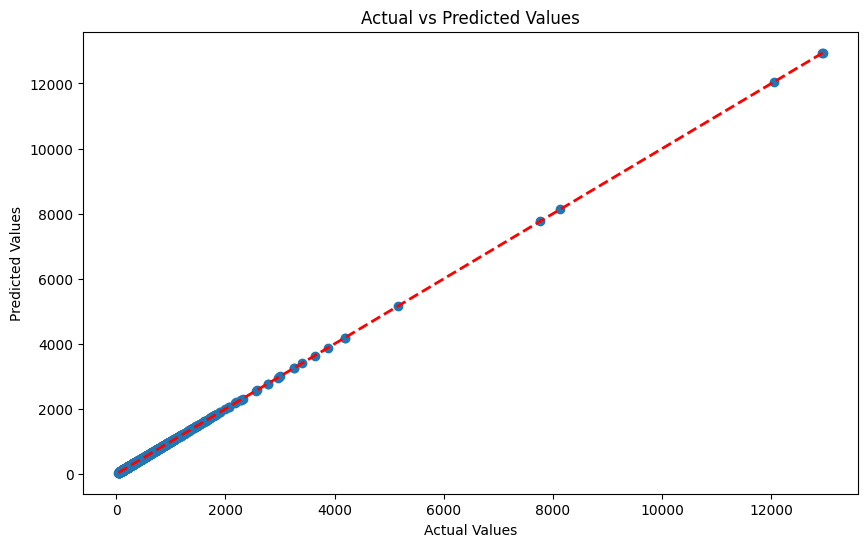

In [24]:
plot_predict_actual(y_test)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=None)),
    ('gb', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1)),
    ('ridge', Ridge(alpha=1.0))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking_model.fit(X_train, y_train)


### Gradient Boosting

In [12]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train.values.ravel())  # Flatten y_train to 1D array

# Predict using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regression Results:")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"R-squared (R²): {gb_r2}")


Gradient Boosting Regression Results:
Mean Squared Error (MSE): 78051.52438910228
R-squared (R²): 0.3077979760449142
